In [2]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
geo = xr.open_dataset("/scratch/julian/ERA5/coszen_data.nc")

integrated = xr.open_dataset("/scratch/julian/ERA5/data_download/july2007_hourly_inst.nc", engine = "netcdf4")
integrated_accum = xr.open_dataset("/scratch/julian/ERA5/data_download/july2007_hourly_accum.nc", engine = "netcdf4")

In [34]:
integrated_accum

<xarray.Dataset> Size: 7GB
Dimensions:     (valid_time: 744, latitude: 321, longitude: 433)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2007-07-01 ... 2007-07-31T23:...
  * latitude    (latitude) float64 3kB 40.0 39.75 39.5 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 3kB -180.0 -179.8 -179.5 ... -72.25 -72.0
    expver      (valid_time) <U4 12kB ...
Data variables: (12/18)
    tp          (valid_time, latitude, longitude) float32 414MB ...
    cdir        (valid_time, latitude, longitude) float32 414MB ...
    slhf        (valid_time, latitude, longitude) float32 414MB ...
    ssr         (valid_time, latitude, longitude) float32 414MB ...
    ssrc        (valid_time, latitude, longitude) float32 414MB ...
    str         (valid_time, latitude, longitude) float32 414MB ...
    ...          ...
    tisr        (valid_time, latitude, longitude) float32 414MB ...
    tsr         (valid_time, latitude, longitude) float32 414MB 3.509e+06 ......
    tsrc        (valid_time, latitude, longitude) float32 414MB ...
    ttr         (valid_time, latitude, longitude) float32 414MB ...
    ttrc        (valid_time, latitude, longitude) float32 414MB ...
    fdir        (valid_time, latitude, longitude) float32 414MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-21T20:32 GRIB to CDM+CF via cfgrib-0.9.1...

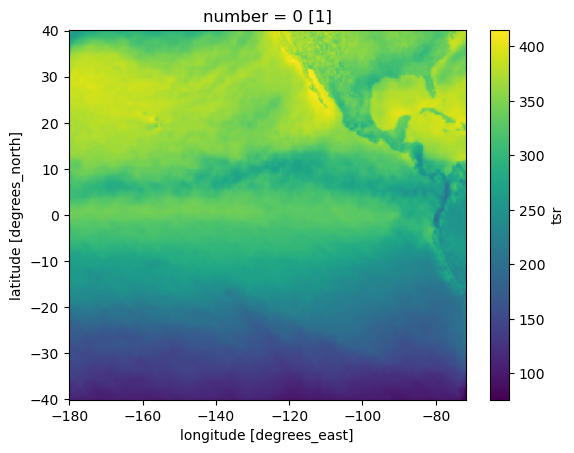

In [4]:
(integrated_accum.tsr.mean(dim= "valid_time")/3600).plot()

In [5]:
lat23 = 17.
lon23 = -149.

In [6]:
integrated_accum.tsr.sel(valid_time = slice("2007-07-01T00:00:00", "2007-07-03T00:00:00"), latitude = 17, longitude = -149.).mean(dim = "valid_time") / 3600

<xarray.DataArray 'tsr' ()> Size: 8B
array(374.06256944)
Coordinates:
    number     int64 8B ...
    latitude   float64 8B 17.0
    longitude  float64 8B -149.0

In [7]:
sim_dir = "/home/jschmitt/ClimaAtmos.jl/calibration/experiments/reanalysis_forcing/toa_cal/output/prognostic_edmfx_tv_era5driven_column/output_active/"
ca_rsut_path = sim_dir + "rsut_10m_inst.nc"
ca_rsutcs_path = sim_dir + "rsutcs_10m_inst.nc"

ca_rsut = xr.open_dataset(ca_rsut_path)
ca_rsutcs = xr.open_dataset(ca_rsutcs_path)


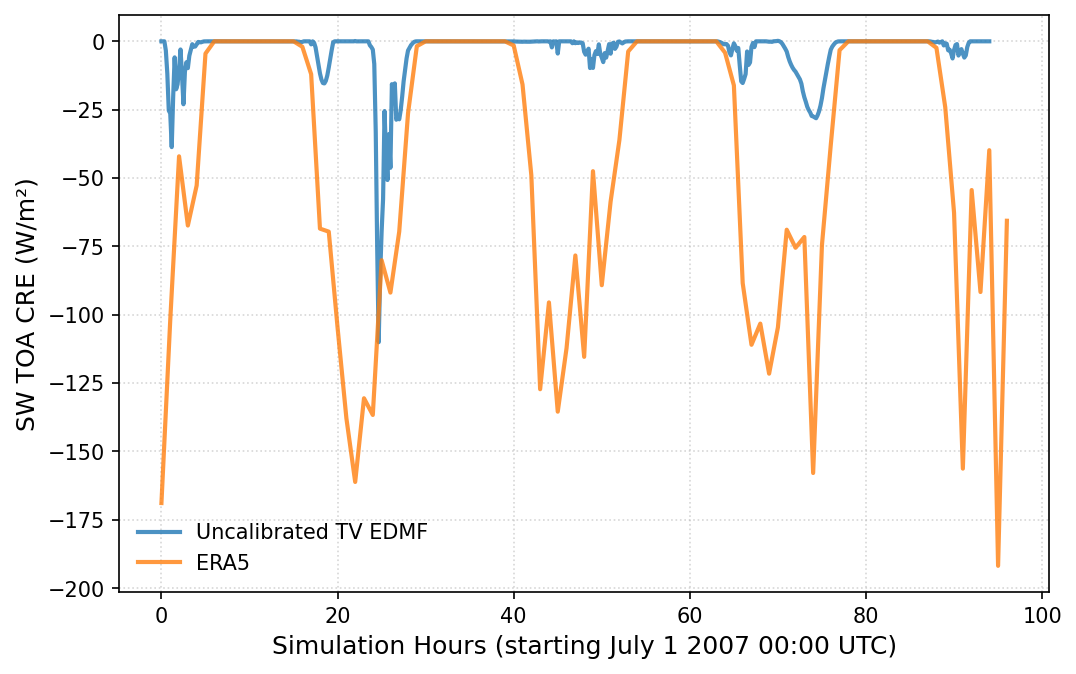

In [8]:
ca_cre = ca_rsutcs.sel(x = 0, y = 0, drop = True).rsutcs.values - ca_rsut.sel(x = 0, y = 0, drop = True).rsut.values
era5_cre = ((integrated_accum.tsr - integrated_accum.tsrc).sel(valid_time = slice("2007-07-01T00:00:00", "2007-07-05T00:00:00"), latitude = 17, longitude = -149.)/3600)

plt.figure(figsize=(8, 5), dpi=150)

plt.plot(ca_rsutcs.time / 3600, ca_cre, label="Uncalibrated TV EDMF", color="tab:blue", linewidth=2, alpha=0.8)
plt.plot(range(len(era5_cre.valid_time)), era5_cre, label="ERA5", color="tab:orange", linestyle="-", linewidth=2, alpha=0.8)

plt.xlabel("Simulation Hours (starting July 1 2007 00:00 UTC)", fontsize=12)
plt.ylabel("SW TOA CRE (W/m²)", fontsize=12)
plt.legend(frameon=False, fontsize=10)
plt.grid(True, linestyle=":", alpha=0.5)

plt.show()



In [9]:
integrated.tclw

<xarray.DataArray 'tclw' (valid_time: 744, latitude: 321, longitude: 433)> Size: 414MB
[103410792 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2007-07-01 ... 2007-07-31T23:...
  * latitude    (latitude) float64 3kB 40.0 39.75 39.5 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 3kB -180.0 -179.8 -179.5 ... -72.25 -72.0
    expver      (valid_time) <U4 12kB ...
Attributes: (12/32)
    GRIB_paramId:                             78
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      138993
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               kg m**-2
    long_name:                                Total column cloud liquid water
    units:                                    kg m**-2
    standard_name:                            unknown
    GRIB_surface:                             0.0

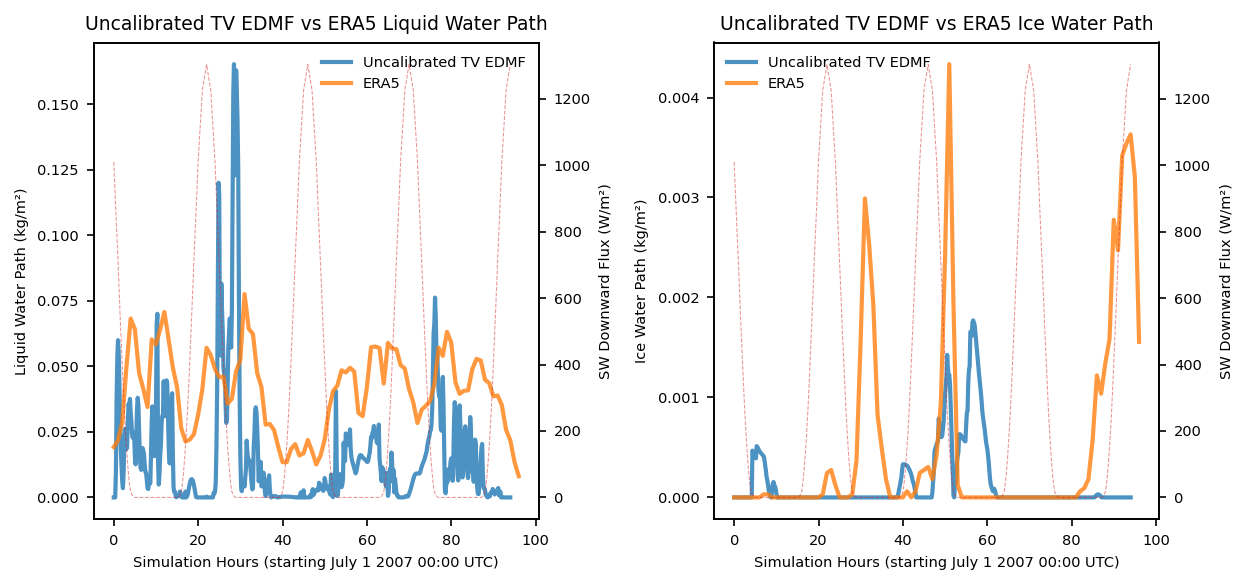

In [10]:
# ((integrated_accum.tsr - integrated_accum.tsrc).sel(valid_time = slice("2007-07-01T00:00:00", "2007-07-04T00:00:00"), latitude = 17, longitude = -149.).mean(dim = "valid_time")/3600)
# examine integrated cloud metrics

# integrated.tclw.sel(valid_time = slice("2007-07-01T00:00:00", "2007-07-04T00:00:00"), latitude = 17, longitude = -149.).plot()
# get rsdt to show diurnal cycle
ca_rsdt = xr.open_dataset(sim_dir + "rsdt_10m_inst.nc").sel(x = 0, y = 0, drop = True)


# get clima observations
ca_rsut.sel(x = 0, y = 0, drop = True).rsut.values
ca_clwvi = xr.open_dataset(sim_dir + "clwvi_10m_inst.nc").sel(x = 0, y = 0, drop = True).clwvi.values

fig, ax = plt.subplots(1, 2, figsize = (8, 4), dpi = 150)
ax[0].plot(ca_rsutcs.time / 3600 , ca_clwvi, label = "Uncalibrated TV EDMF", color = "tab:blue", linewidth = 2, alpha = 0.8)
# get era5 observations 
era5_clwvi = integrated.tclw.sel(valid_time = slice("2007-07-01T00:00:00", "2007-07-05T00:00:00"), latitude = 17, longitude = -149., drop = True)
ax[0].plot(range(len(era5_clwvi.valid_time)), era5_clwvi, label = "ERA5", color = "tab:orange", linestyle = "-", linewidth = 2, alpha = 0.8)

ax[0].set_xlabel("Simulation Hours (starting July 1 2007 00:00 UTC)", fontsize = 7)
ax[0].set_ylabel("Liquid Water Path (kg/m²)", fontsize = 7)
ax[0].set_title("Uncalibrated TV EDMF vs ERA5 Liquid Water Path", fontsize = 9)
ax[0].legend(frameon = False, fontsize = 7)

ax_0t = ax[0].twinx()
ax_0t.plot(ca_rsdt.time / 3600, ca_rsdt.rsdt.values, label = "SW Downward Flux", color = "tab:red", linestyle = "--", linewidth = .5, alpha = 0.5)
ax_0t.set_ylabel("SW Downward Flux (W/m²)", fontsize = 7)
ax_0t.tick_params(axis='both', labelsize=7)

# repeat for ice path
ca_clivi = xr.open_dataset(sim_dir + "clivi_10m_inst.nc").sel(x = 0, y = 0, drop = True).clivi.values
ax[1].plot(ca_rsutcs.time / 3600 , ca_clivi, label = "Uncalibrated TV EDMF", color = "tab:blue", linewidth = 2, alpha = 0.8)
era5_clivi = integrated.tciw.sel(valid_time = slice("2007-07-01T00:00:00", "2007-07-05T00:00:00"), latitude = 17, longitude = -149., drop = True)
ax[1].plot(range(len(era5_clivi.valid_time)), era5_clivi, label = "ERA5", color = "tab:orange", linestyle = "-", linewidth = 2, alpha = 0.8)

ax[1].set_xlabel("Simulation Hours (starting July 1 2007 00:00 UTC)", fontsize = 7)
ax[1].set_ylabel("Ice Water Path (kg/m²)", fontsize = 7)
ax[1].set_title("Uncalibrated TV EDMF vs ERA5 Ice Water Path", fontsize = 9)
ax[0].tick_params(axis='both', labelsize=7)
ax[1].tick_params(axis='both', labelsize=7)
ax[1].legend(frameon = False, fontsize = 7)
plt.tight_layout()


ax_1t = ax[1].twinx()
ax_1t.plot(ca_rsdt.time / 3600, ca_rsdt.rsdt.values, label = "SW Downward Flux", color = "tab:red", linestyle = "--", linewidth = .5, alpha = 0.5)
ax_1t.set_ylabel("SW Downward Flux (W/m²)", fontsize = 7)
ax_1t.tick_params(axis='both', labelsize=7)

plt.show()

In [31]:
# compute correlation coefficient between lwp and rsdt 
np.corrcoef(ca_clwvi, ca_rsdt.rsdt.values)[0, 1]
from scipy.signal import resample
np.corrcoef(resample(era5_clwvi.values, len(ca_rsdt.rsdt.values)), ca_rsdt.rsdt.values)[0, 1]

-0.43832986448784506

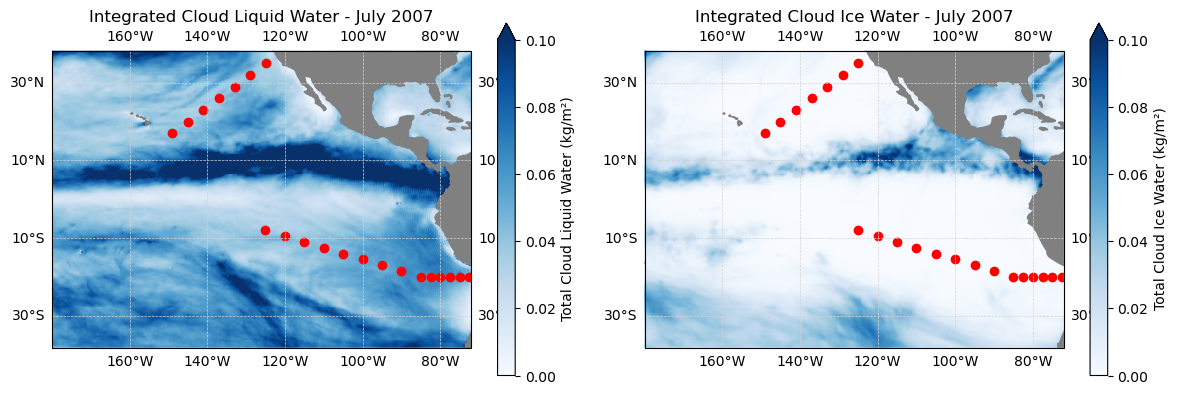

In [27]:
# integrated.sel(latitude = 17., longitude = 211)
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

tclw_avg = integrated.tclw.mean(dim="valid_time")
tciw_avg = integrated.tciw.mean(dim="valid_time")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={"projection": ccrs.PlateCarree()})


extent = [-180, -72, -25, 25]

# Plot Total Cloud Liquid Water
ax = axes[0]
tclw_avg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="Blues", cbar_kwargs={"label": "Total Cloud Liquid Water (kg/m²)", "shrink": .75}, vmin = 0, vmax = 0.1)
ax.set_title("Integrated Cloud Liquid Water - July 2007")
ax.set_extent(extent)
# ax.add_feature(cfeature.COASTLINE, zorder = 2)
ax.add_feature(cfeature.LAND, color="gray", alpha=1, zorder =1)

# Plot Total Cloud Ice Water
ax = axes[1]
tciw_avg.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="Blues", cbar_kwargs={"label": "Total Cloud Ice Water (kg/m²)", "shrink": .75}, vmin = 0, vmax = 0.1)
ax.set_title("Integrated Cloud Ice Water - July 2007")
ax.set_extent(extent)
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color="gray", alpha=1, zorder = 1)

# Filter locations where site is between 1 and 23
filtered_sites = geo.where((geo.site >= 1) & (geo.site <= 23) & (geo.site !=16), drop=True)

# Add scatter points to the plots
for ax in axes:
    ax.scatter(filtered_sites.lon, filtered_sites.lat, color="red", marker="o", transform=ccrs.PlateCarree(), label="Sites")

for ax in axes:
    ax.gridlines(draw_labels=True, linewidth=0.5, color="lightgray", linestyle="--", xlocs=np.arange(-180, 181, 20), ylocs=np.arange(-90, 91, 20))



plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pre-calibration Cloud Liquid Water Profiles')

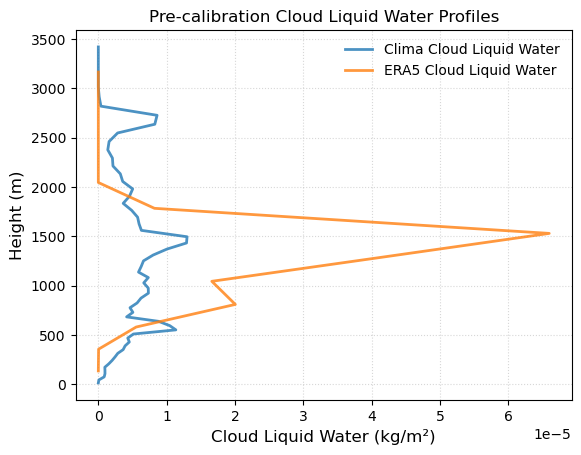

In [11]:
clima_clw = xr.open_dataset(sim_dir + "clw_10m_inst.nc").sel(x = 0, y = 0, drop = True)
clima_clw_s = clima_clw.where(clima_clw.z < 3500, drop = True)
plt.plot(clima_clw_s.clw.mean(dim = "time").values, clima_clw_s.z, label = "Clima Cloud Liquid Water", color = "tab:blue", linewidth = 2, alpha = 0.8)

era5_clw = xr.open_dataset("/scratch/julian/ERA5/data_download/july2007_forcing_and_cloud_hourly_profiles.nc").sel(latitude = 17, longitude = -149, method = "nearest").mean(dim = "valid_time")
era5_clw_s = era5_clw.where(era5_clw.z < 37000, drop = True)
plt.plot(era5_clw_s.clwc, era5_clw_s.z / 9.81, label = "ERA5 Cloud Liquid Water", color = "tab:orange", linestyle = "-", linewidth = 2, alpha = 0.8)

plt.xlabel("Cloud Liquid Water (kg/m²)", fontsize = 12)
plt.ylabel("Height (m)", fontsize = 12)
plt.legend(frameon = False, fontsize = 10)
plt.grid(True, linestyle = ":", alpha = 0.5)
plt.title("Pre-calibration Cloud Liquid Water Profiles", fontsize = 12)

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 744, latitude: 321, longitude: 433)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 6kB 2007-07-01 ... 2007-07-31T23:...
  * latitude    (latitude) float64 3kB 40.0 39.75 39.5 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 3kB -180.0 -179.8 -179.5 ... -72.25 -72.0
    expver      (valid_time) <U4 12kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 414MB ...
    sst         (valid_time, latitude, longitude) float32 414MB ...
    ishf        (valid_time, latitude, longitude) float32 414MB ...
    tciw        (valid_time, latitude, longitude) float32 414MB ...
    tclw        (valid_time, latitude, longitude) float32 414MB ...
    skt         (valid_time, latitude, longitude) float32 414MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-21T20:32 GRIB to CDM+CF via cfgrib-0.9.1...

35.0 -485.0
32.0 -489.0
29.0 -493.0
26.0 -497.0
23.0 -501.0
20.0 -505.0
17.0 -509.0


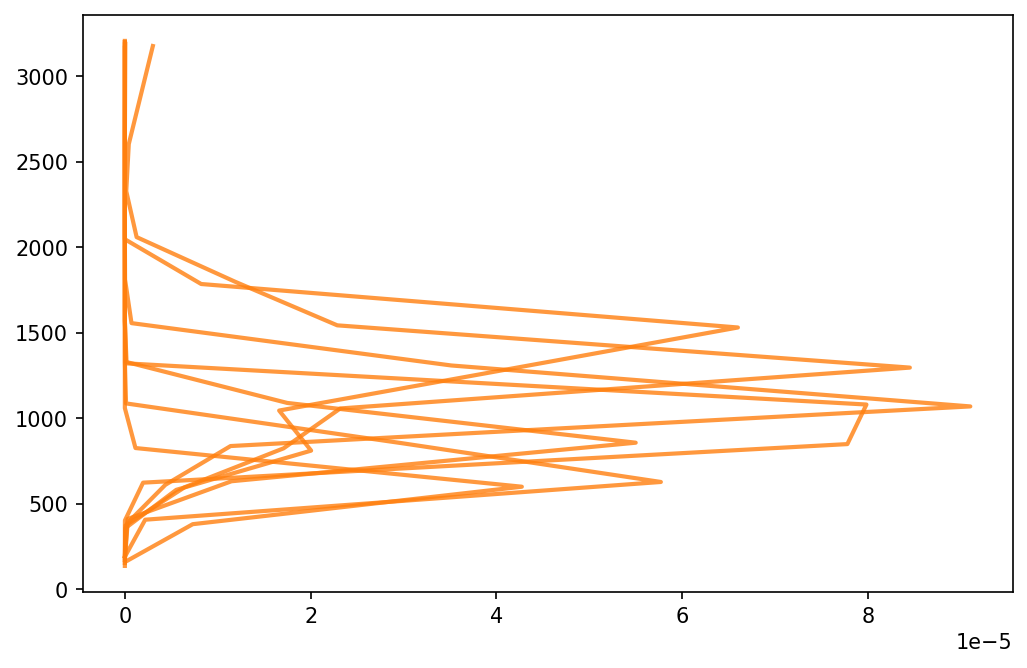

In [12]:
# plot profiles of clw for a range of sites from ERA5
fig, ax = plt.subplots(1, 1, figsize = (8, 5), dpi = 150)

# transition_region_sites = geo.where((geo.site < 24) & (geo.site > 16), drop =True) 
for site in range(17, 24):
    lat = geo.where(geo.site == site, drop = True).lat.values[0]
    lon = geo.where(geo.site == site, drop = True).lon.values[0] - 360
    print(lat, lon-360)

    # select data for site
    site_clw = xr.open_dataset("/scratch/julian/ERA5/data_download/july2007_forcing_and_cloud_hourly_profiles.nc").sel(latitude = lat, longitude = lon, method = "nearest").mean(dim = "valid_time")
    site_clw_s = site_clw.where(era5_clw.z < 37000, drop = True)
    plt.plot(site_clw_s.clwc, site_clw_s.z / 9.81, label = "ERA5 Cloud Liquid Water", color = "tab:orange", linestyle = "-", linewidth = 2, alpha = 0.8)



In [ ]:
output_file = 'integrated_cfsite_obs_data.nc'

for site in geo.site.values:
    loc = geo.where(geo.site ==site, drop = True)
    lat = loc.lat.values[0]
    lon = loc.lon.values[0]
    #for month in range(1, 13):
    integrated_ds = integrated.sel(latitude = lat, longitude = lon, method = "nearest", drop = True)[vars]
    # flip sign of variables to be consistent with clima values
    for var in flip_sign:
        integrated_ds[var] = -1 * integrated_ds[var]
    # rename to clima variables based on dictionary 
    integrated_ds = integrated_ds.rename(name_mapper)

    integrated_ds.to_netcdf(output_file, mode='a', group=f'site{site}')

In [2]:
# Site Selection
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
ds

<xarray.Dataset> Size: 20GB
Dimensions:         (valid_time: 120, pressure_level: 37, latitude: 321,
                     longitude: 433)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 960B 2007-07-01 ... 2007-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 3kB 40.0 39.75 39.5 ... -39.75 -40.0
  * longitude       (longitude) float64 3kB -180.0 -179.8 ... -72.25 -72.0
    expver          (valid_time) <U4 2kB ...
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    ciwc            (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    clwc            (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    w               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-21T19:41 GRIB to CDM+CF via cfgrib-0.9.1...

In [35]:
ds

<xarray.Dataset> Size: 20GB
Dimensions:         (valid_time: 120, pressure_level: 37, latitude: 321,
                     longitude: 433)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 960B 2007-07-01 ... 2007-07-0...
  * pressure_level  (pressure_level) float64 296B 1e+03 975.0 950.0 ... 2.0 1.0
  * latitude        (latitude) float64 3kB 40.0 39.75 39.5 ... -39.75 -40.0
  * longitude       (longitude) float64 3kB -180.0 -179.8 ... -72.25 -72.0
    expver          (valid_time) <U4 2kB ...
Data variables:
    z               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    ciwc            (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    clwc            (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
    w               (valid_time, pressure_level, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-21T19:41 GRIB to CDM+CF via cfgrib-0.9.1...

ValueError: size of dimension 'date' on inputs was unexpectedly changed by applied function from 12 to 1. Only dimensions specified in ``exclude_dims`` with xarray.apply_ufunc are allowed to change size. The data returned was:

array([], shape=(1, 0), dtype=float64)

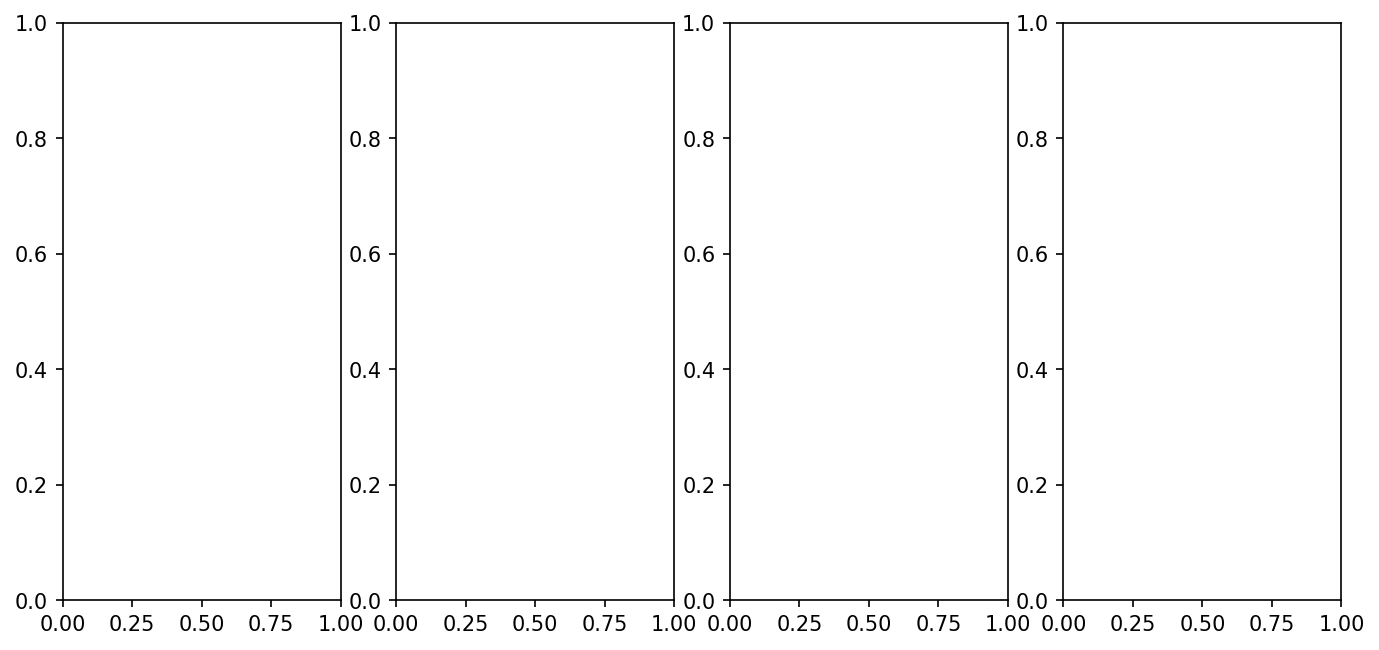

In [48]:
# plot profiles of clw for a range of sites from ERA5
fig, ax = plt.subplots(1, 4, figsize = (11, 5), dpi = 150)
ds = xr.open_dataset("/scratch/julian/ERA5/data_download/july2007_forcing_and_cloud_hourly_profiles.nc")
# transition_region_sites = geo.where((geo.site < 24) & (geo.site > 16), drop =True) 

# Set colormap
cmap = plt.cm.viridis
num_sites = 24 - 17
colors = cmap(np.linspace(0, 1, num_sites))
lats = np.repeat(10, 1)
lons = [-135]
# Loop through sites
for i, site_loc in enumerate(range(2)):
    lat = geo.where(geo.site == site_loc, drop=True).lat.values[0]
    lon = geo.where(geo.site == site_loc, drop=True).lon.values[0] - 360
    # print(f"Site {site_loc}: lat = {lat}, lon = {lon}")
    lat = lats[i]
    lon = lons[i]
    site_loc = lon

    # Select data for site
    site = ds.sel(latitude=lat, longitude=lon, method="nearest").isel(valid_time = 72)
    site_s = site.where(site.z < 100000, drop=True)

    # Plot with color from colormap
    ax[0].plot(site_s.clwc, site_s.z / 9.81, label=f"Site {site_loc}", color=colors[i], linestyle="-", linewidth=2, alpha=0.8)
    ax[1].plot(site_s.q, site_s.z / 9.81, label=f"Site {site_loc}", color=colors[i], linestyle="-", linewidth=2, alpha=0.8)
    ax[2].plot(site_s.t, site_s.z / 9.81, label=f"Site {site_loc}", color=colors[i], linestyle="-", linewidth=2, alpha=0.8)
    ax[3].plot(site_s.ciwc, site_s.z / 9.81, label=f"Site {site_loc}", color=colors[i], linestyle="-", linewidth=2, alpha=0.8)

# Labels and legend
ax[0].set_xlabel("ql (kg/m³)")
ax[0].set_ylabel("Height (m)")
ax[1].set_xlabel("Specific Humidity (kg/kg)")
ax[2].set_xlabel("Temperature")
ax[2].legend(title="Sites", loc="upper right")

# Show plot
plt.show()

In [44]:
geo.where(geo.site == 23, drop = True)

<xarray.Dataset> Size: 216B
Dimensions:  (site: 1, date: 12)
Coordinates:
  * site     (site) int64 8B 23
  * date     (date) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    lat      (site) float64 8B 17.0
    lon      (site) float64 8B 211.0
    coszen   (date, site) float64 96B 0.622 0.6843 0.7431 ... 0.6408 0.6034